In [1]:
# Boston Housing Pricing Dataset

!pip install keras

In [1]:
!pip install tensforflow

  Could not find a version that satisfies the requirement tensforflow (from versions: )
No matching distribution found for tensforflow


In [3]:
from keras.datasets import boston_housing
import tensorflow as tf

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [7]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [8]:
train_data.shape

(404, 13)

In [9]:
test_data.shape

(102, 13)

In [10]:
train_targets

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

In [11]:
# Preparing for the data

# Normalize the data

In [12]:
mean = train_data.mean(axis=0)

In [13]:
train_data -= mean

In [14]:
std = train_data.std(axis = 0)

In [15]:
train_data /= std

In [16]:
test_data -= mean

In [17]:
test_data /= std

In [18]:
# We use a small network with 2 layers and 64 hidden units.

# The smaller the dataset, the worse the overfitting problem for us will be. Using a small network is a way to mitigate
# the overfitting problem.

In [19]:
from keras import models

In [20]:
from keras import layers

In [21]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [22]:
# As the dataset is pretty small, the validation set will be much smaller too.
# To mitigate this problem, we employ a k-fold cross validation approach

In [23]:
import numpy as np

In [24]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]], axis = 0
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]], axis = 0
    )
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose =0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [25]:
all_scores
np.mean(all_scores)

2.3837935992396706

In [26]:
# Let us increase the epochs to 500

In [29]:
# num_epochs = 10
# all_mae_history = []
# val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
# val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
# partial_train_data = np.concatenate(
# [train_data[:i * num_val_samples],
# train_data[(i + 1) * num_val_samples:]], axis = 0
# )

# partial_train_targets = np.concatenate(
# [train_targets[:i * num_val_samples],
# train_targets[(i + 1) * num_val_samples:]], axis = 0
# )

# model = build_model()
# history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose=0)


In [30]:
# history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

In [31]:
num_epochs = 500
all_mae_history = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]], axis = 0
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]], axis = 0
    )
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose=0)
    
    mae_history = history.history['mean_absolute_error']
    all_mae_history.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [32]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

In [33]:
# Let us plot this figure now

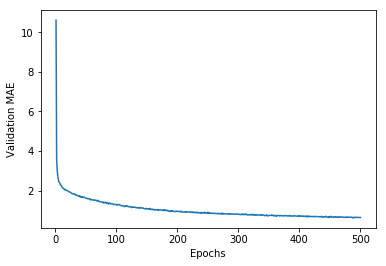

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [35]:
# Smoothening the curve as the first few values have a high variance in them

In [36]:
# Omit the first 10 data points
# Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

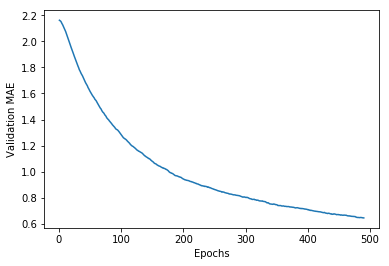

In [37]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [38]:
# Training the final model

In [47]:
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose =0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

 32/102 [========>.....................] - ETA: 0s

In [48]:
test_mae_score

2.6893550928901222